# Shifted-tilted Tophat at Gaussian interference at waist

Applying first-order shift,tilt to tophat, integrate with HG00

\begin{equation}
	u_{n,m} \rightarrow
     u_{n,m}
        \left[
        1 - \frac{2 a }{w(z)^2} x + i k \alpha x - i \frac{2 k \alpha a}{w(z)^2} x^2 
    \right]
    + 
	a \frac{2 \sqrt{n}}{w(z)} 
	\exp(i \Psi(z))
	u_{n-1,m}
	\left[
        1+ i k \alpha x
    \right]	 \; .
\end{equation}

Scatter these with

\begin{align*}
\sum_{n,m} u_{n,m} \rightarrow 
	\sum_{n,m} 
	\lbrace &
		u_{n+2,m}[ X_+^2(-i\frac{2ka\alpha}{w^2})]
		\\+&
		u_{n+1,m}[ X_+^1(ik\alpha - \frac{2a}{w^2})]
		\\+&
		u_{n,m} [1+X_+^1(ik\alpha \frac{2a\sqrt{n}}{w} e^{i\Psi})- X_0^2 (i\frac{2ka\alpha}{w^2})]
		\\+&
		u_{n-1,m} [\frac{2a\sqrt{n}}{w} e^{i\Psi} + X_-^1(ik\alpha - \frac{2a}{w^2})]
		\\+&
		u_{n-2,m} [ X_-^1(ik\alpha a\frac{2\sqrt{n}}{w}e^{i\Psi}) - X_-^2 (i\frac{2ka\alpha}{w^2})] 	
	\rbrace
\end{align*}

In [1]:
import PauLisa as pl, PL_Plot as plplt,plback as plb, Tophat_integration_AW as th, numpy as np, matplotlib.pyplot as plt, cmath as cm

from numpy import pi as pi
from numpy import angle
from math import e
from numpy import sqrt as sqrt
from scipy.special import erf as erf
import mpmath as mp
import scipy.io

from math import pi, log, exp, sin, cos, atan, e, radians, degrees
from scipy.special import gamma as gamma
from scipy.special import erf as erf
from math import factorial as fact
import cmath
from cmath import sqrt as sqrt
import numpy as np

from time import process_time

inf=np.inf

import pandas as pd
from pprint import pprint


## Tophat coeffients from AW

In [2]:
mat = scipy.io.loadmat('Top_hat_for_paul.mat')
coef=mat['coeftop'].ravel()

def N_f(A):
    
    res = np.floor((np.sqrt(8*A+1)-1)/2)
    
    #res = (np.sqrt(9+8*A)-3)/2
    return(res)

def m(N,A):
    res = (N+1)*(N+2)/2 - (A+1)
    return(res)

#def n(N,A):
#    m= (N+1)*(N+2)/2 - (A+1)
#    res = N-m
#    return(res)
def n(N,A):
    res = A - (N*(N+1)/2)
    return(res)

NumberModes = int(len(coef))
listModesN = [None] * NumberModes
listModesM = [None] * NumberModes
listModesC = [None] * NumberModes

area = pi*1e-3**2

#for i in range(len(coef)):
#    A=i
#    N= N_f(A)
#
#    if (m(N,A)%2 == 0) & (n(N,A)%2 == 0):
#        print(coef[A], '\t\t\t' , m(N,A), ',' , n(N,A))

for i in range(NumberModes):
    A=i
    N= N_f(A)
    listModesN[i] = int(m(N,A))
    listModesM[i] = int(n(N,A))
    listModesC[i] = coef[i]/sqrt(area)
    
    

In [3]:


modes = pl.create_modes(listModesM,listModesN,listModesC,NumberModes)

N=28 # mode order
modes_N= pl.create_modes_orderN(listModesM,listModesN,listModesC,NumberModes,N)




## Integration for signals

In [4]:
#loop through and sum over modes overlap where a,b -> n,m
def iterate_modes_overlap(w_1,w_2,zR_1,zR_2,k_1,k_2,d_1,W_2,x_1,x_2,Z,Y,modes):   

    N = len(modes)
    M = len(modes[0])
    res_arr = [[0 for i in range(10)] for j in range(10)]
    res = 0

    for a in range(N):
        for b in range(M):            
            #ignore zero coeff.
            if (modes[a][b]!=0):
                c_nm = modes[a][b]
                res += c_nm * th.overlap(a,b,w_1,w_2,zR_1,zR_2,k_1,k_2,d_1,W_2,x_1,x_2,Z,Y)
                #print( 'n,m:',a,b,th.overlap(a,b,w_1,w_2,zR_1,zR_2,k_1,k_2,d_1,W_2,x_1,x_2,Z,Y))
                
    return(res)

In [5]:
def signals(v):
    points = v.points
    time_start = process_time()

    time_ave = 0

    #modes_arr = [0]*points
    cl = [0]*points
    cr = [0]*points
    phi_l = [0]*points
    phi_r = [0]*points
    dws = [0]*points
    lps = [0]*points


    #alpha_arr = np.linspace(-500e-6,500e-6,points)

    for p in range (points):
        #modes_arr[p] = pl.scatter_case2_first_order(z,params,a,alpha,modes18) #array of array of scattered modes#array of array of scattered modes
        time_ave_start = process_time()

        cl[p] = iterate_modes_overlap(v.w_1,v.w_2,v.zR_1,v.zR_2,v.k_1,v.k_2,v.d_1,v.W_2,v.x_1L,v.x_2L,v.Z,v.Y,v.modes_arr[p]) # left overlap (-2e-3,0)

        cr[p] = iterate_modes_overlap(v.w_1,v.w_2,v.zR_1,v.zR_2,v.k_1,v.k_2,v.d_1,v.W_2,v.x_1R,v.x_2R,v.Z,v.Y,v.modes_arr[p]) # right overlap (0,2e-3)
        time_ave += (process_time()-time_ave_start)


        phi_r[p]=angle(cr[p])
        phi_l[p]=angle(cl[p])

        dws[p] = phi_r[p]-phi_l[p]
        lps[p] = 0.5*(phi_r[p]+phi_l[p])
    
    time_elapsed = (process_time() - time_start)
    print(time_elapsed,'s')
    print(time_ave/p,'s')
    
    return(dws,lps)

In [6]:
class Vars:
#modes,alpha with points
    def __init__(self, 
                 lam=1064e-9,
                 z_PD=10e-3,z=10e-3,
                 z_m=0,Z=10e-3,
                 z_LO=0, d_1=10e-3,
                 Y=2e-3,
                 x_1R=20e-6,x_2R=2e-3,
                 x_1L=-2e-3,x_2L=-20e-6,
                 w_1=1e-3, w_2=0.00023067,
                 zR_1=pi*1e-3**2/1064e-9,zR_2=pi*0.00023067**2/1064e-9,
                 k_1=5905249.348852994,k_2=5905249.348852994,
                 params=pl.Params(1064e-9,0.00023067,0),
                 W_2=pl.w(0.00023067,pl.Params(1064e-9,0.00023067,0)),
                 points=51,
                 a=10e-6,alpha_arr=np.linspace(-500e-6,500e-6,51),modes_arr=[0]*51):
        self.lam = lam


        self.z_PD = z_PD #PD location
        self.z = z #prop distance assumed PD

        self.z_m = z_m #meas beam 
        self.Z = Z #distance PD-m

        self.z_LO = z_LO #Local ref. beam
        self.d_1 = d_1 #distance PD-LO


        self.Y = Y #Y int bound

        self.x_1R = x_1R
        self.x_2R = x_2R 

        self.x_1L = x_1L #assumed symmetric with right side
        self.x_2L = x_2L

        self.w_1 = w_1 #waist LO 
        self.w_2 = w_2 #waist MS

        self.zR_1 = zR_1 #rayleigh LO
        self.zR_2 = zR_2


        self.k_1 = k_1 #wavenum LO
        self.k_2 = k_2

        self.params = params #for building tophat coefficients

        self.W_2 = W_2 #tophat beam rad , w(z) or 1e-3?



        #integration and misalignment
        self.points = points

        self.a = a
        self.alpha_arr = alpha_arr

        self.modes_arr = modes_arr

        #build modes from misalignments
        for p in range (points):
            self.modes_arr[p] = pl.scatter_case2_first_order(z,params,a,alpha_arr[p],modes) #array of array of scattered modes#array of array of scattered modes

    def setz(self,z):
        self.z = z #prop distance assumed PD
        self.z_PD = z #PD location
        
        self.Z = z-self.z_m #distance PD-m

        self.d_1 = self.z_PD-self.z_LO #distance PD-LO
    
        self.W_2 = pl.w(z,pl.Params(1064e-9,0.00023067,0))
        
v = Vars()


## Defaults

49.234375 s
0.9846875 s


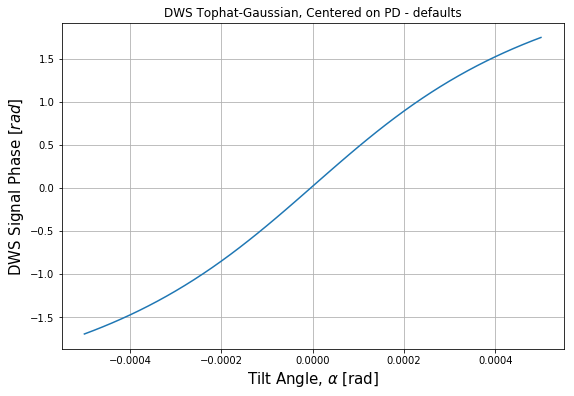

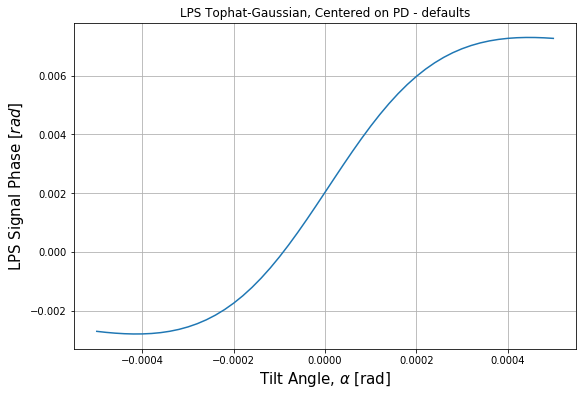

In [7]:
dws,lps = signals(v)
####################
plt.figure(figsize=(9,6))
plt.plot(v.alpha_arr, dws)

plt.xlabel(r'Tilt Angle, $\alpha\;$[' + 'rad]', fontsize=15) 
plt.ylabel(r'DWS Signal Phase $[' +  'rad]$', fontsize=15) 
plt.title(r'DWS Tophat-Gaussian, Centered on PD - defaults') 
plt.grid()

#plt.savefig("5-4_HG00_dws.png")
########################
plt.figure(figsize=(9,6))
plt.plot(v.alpha_arr, lps)

plt.xlabel(r'Tilt Angle, $\alpha\;$[' + 'rad]', fontsize=15) 
plt.ylabel(r'LPS Signal Phase $[' +  'rad]$', fontsize=15) 
plt.title(r'LPS Tophat-Gaussian, Centered on PD - defaults') 

plt.grid()

#plt.savefig("5-4_HG00_lps.png")

## Distance PD

In [8]:
param_name = 'Distance to PD'
distance_to_pd = [10e-3,5e-3,2e-3,1e-3,0e-3]
dws_arr = [0]*len(distance_to_pd)
lps_arr = [0]*len(distance_to_pd)
ind=0
for i in (distance_to_pd):
    v=Vars()
    v.setz(i)
    dws_arr[ind],lps_arr[ind]=signals(v)
    ind+=1

49.953125 s
0.9990625 s
48.859375 s
0.9771875 s
51.09375 s
1.021875 s
50.765625 s
1.0153125 s
50.953125 s
1.0190625 s


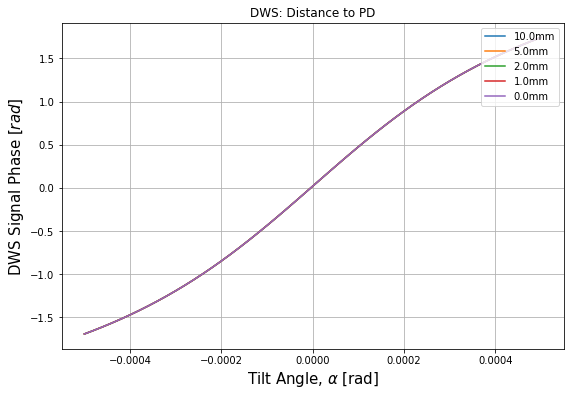

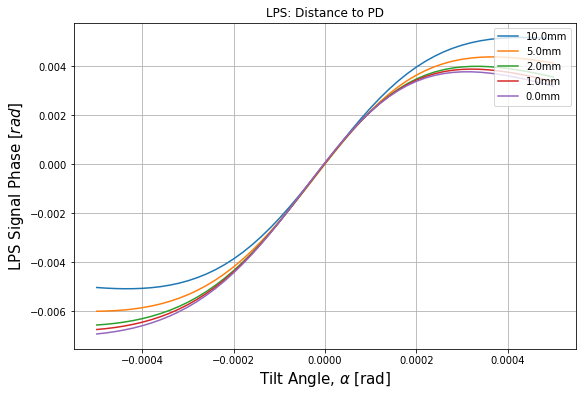

In [9]:
####################
plt.figure(figsize=(9,6))

ind = 0
for i in (dws_arr):
    plt.plot(v.alpha_arr, i,label=str(distance_to_pd[ind]*1e3)+'mm')
    ind+=1
    
plt.xlabel(r'Tilt Angle, $\alpha\;$[' + 'rad]', fontsize=15) 
plt.ylabel(r'DWS Signal Phase $[' +  'rad]$', fontsize=15) 
plt.title(r'DWS: '+param_name) 
plt.legend(loc='upper right')
plt.grid()

#plt.savefig("5-4_HG00_dws.png")
########################
plt.figure(figsize=(9,6))

ind=0
for i in (lps_arr):
    plt.plot(v.alpha_arr, i,label=str(distance_to_pd[ind]*1e3)+'mm')
    ind+=1
    
plt.xlabel(r'Tilt Angle, $\alpha\;$[' + 'rad]', fontsize=15) 
plt.ylabel(r'LPS Signal Phase $[' +  'rad]$', fontsize=15) 
plt.title(r'LPS: '+param_name) 
plt.legend(loc='upper right')
plt.grid()

#plt.savefig("5-4_HG00_lps.png")

## PD Size

In [10]:
param_name = 'PD Size'
par1 = [200e-3,2e-3,1.5e-3,1e-3]
dws_arr1 = [0]*len(par1)
lps_arr1 = [0]*len(par1)
ind=0
for i in (par1):
    v=Vars()
    v.x_2R=i
    v.x_1L=-i
    dws_arr1[ind],lps_arr1[ind]=signals(v)
    ind+=1

52.765625 s
1.055 s
49.203125 s
0.9840625 s
48.359375 s
0.9671875 s
49.859375 s
0.9971875 s


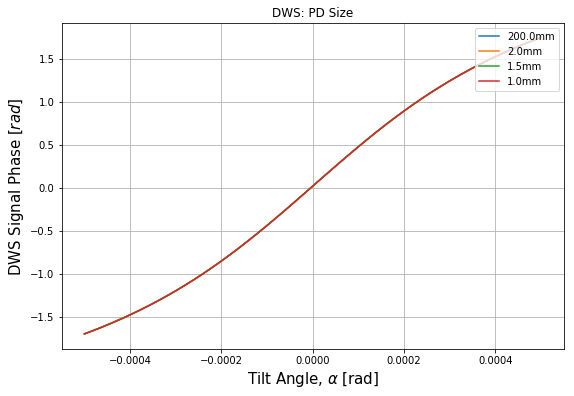

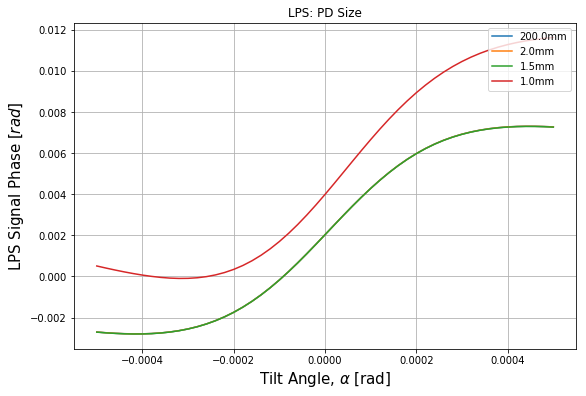

In [11]:
####################
plt.figure(figsize=(9,6))

ind = 0
for i in (dws_arr1):
    plt.plot(v.alpha_arr, i,label=str(par1[ind]*1e3)+'mm')
    ind+=1
    
plt.xlabel(r'Tilt Angle, $\alpha\;$[' + 'rad]', fontsize=15) 
plt.ylabel(r'DWS Signal Phase $[' +  'rad]$', fontsize=15) 
plt.title(r'DWS: '+param_name) 
plt.legend(loc='upper right')
plt.grid()

#plt.savefig("5-4_HG00_dws.png")
########################
plt.figure(figsize=(9,6))

ind=0
for i in (lps_arr1):
    plt.plot(v.alpha_arr, i,label=str(par1[ind]*1e3)+'mm')
    ind+=1
    
plt.xlabel(r'Tilt Angle, $\alpha\;$[' + 'rad]', fontsize=15) 
plt.ylabel(r'LPS Signal Phase $[' +  'rad]$', fontsize=15) 
plt.title(r'LPS: '+param_name) 
plt.legend(loc='upper right')
plt.grid()

#plt.savefig("5-4_HG00_lps.png")

## Gap Size

In [12]:
param_name = 'Gap Size'
par1 = [50e-6,20e-6,0]
dws_arr1 = [0]*len(par1)
lps_arr1 = [0]*len(par1)
ind=0
for i in (par1):
    v=Vars()
    v.x_1R=i
    v.x_2L=-i
    dws_arr1[ind],lps_arr1[ind]=signals(v)
    ind+=1

46.4375 s
0.92875 s
46.546875 s
0.9309375 s
45.890625 s
0.9178125 s


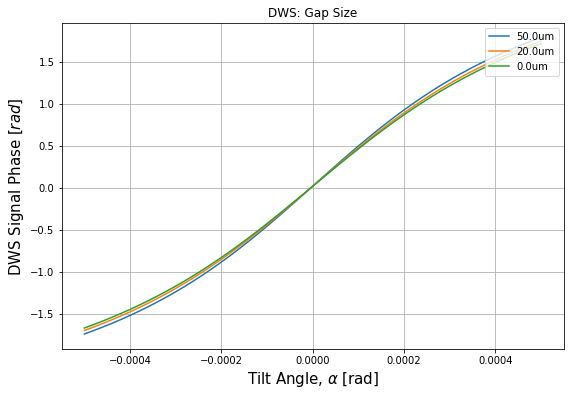

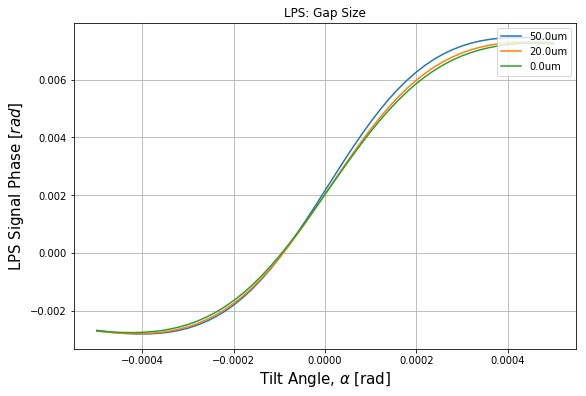

In [13]:
####################
plt.figure(figsize=(9,6))

ind = 0
for i in (dws_arr1):
    plt.plot(v.alpha_arr, i,label=str(par1[ind]*1e6)+'um')
    ind+=1
    
plt.xlabel(r'Tilt Angle, $\alpha\;$[' + 'rad]', fontsize=15) 
plt.ylabel(r'DWS Signal Phase $[' +  'rad]$', fontsize=15) 
plt.title(r'DWS: '+param_name) 
plt.legend(loc='upper right')
plt.grid()

#plt.savefig("5-4_HG00_dws.png")
########################
plt.figure(figsize=(9,6))

ind=0
for i in (lps_arr1):
    plt.plot(v.alpha_arr, i,label=str(par1[ind]*1e6)+'um')
    ind+=1
    
plt.xlabel(r'Tilt Angle, $\alpha\;$[' + 'rad]', fontsize=15) 
plt.ylabel(r'LPS Signal Phase $[' +  'rad]$', fontsize=15) 
plt.title(r'LPS: '+param_name) 
plt.legend(loc='upper right')
plt.grid()

#plt.savefig("5-4_HG00_lps.png")

## Ref. beam waist size

In [14]:
param_name = 'Ref. Beam Waist'
par1 = [2e-3,1e-3,0.5e-3]
dws_arr1 = [0]*len(par1)
lps_arr1 = [0]*len(par1)
ind=0
for i in (par1):
    v=Vars()
    v.w_1=i
    dws_arr1[ind],lps_arr1[ind]=signals(v)
    ind+=1

46.6875 s
0.93375 s
46.453125 s
0.9290625 s
49.515625 s
0.9903125 s


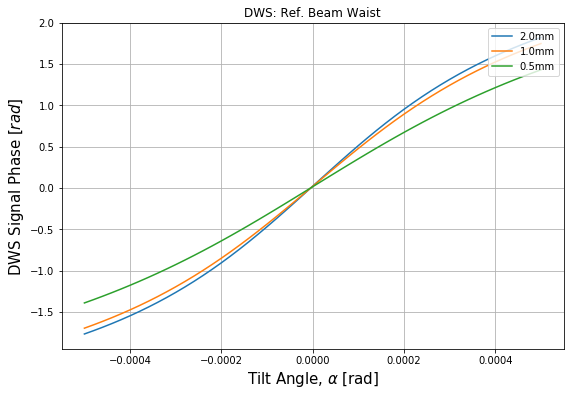

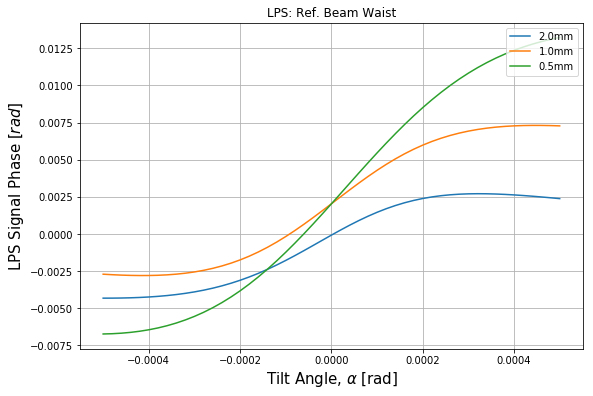

In [15]:
####################
plt.figure(figsize=(9,6))
param_name = 'Ref. Beam Waist'
ind = 0
for i in (dws_arr1):
    plt.plot(v.alpha_arr, i,label=str(par1[ind]*1e3)+'mm')
    ind+=1
    
plt.xlabel(r'Tilt Angle, $\alpha\;$[' + 'rad]', fontsize=15) 
plt.ylabel(r'DWS Signal Phase $[' +  'rad]$', fontsize=15) 
plt.title(r'DWS: '+param_name) 
plt.legend(loc='upper right')
plt.grid()

#plt.savefig("5-4_HG00_dws.png")
########################
plt.figure(figsize=(9,6))

ind=0
for i in (lps_arr1):
    plt.plot(v.alpha_arr, i,label=str(par1[ind]*1e3)+'mm')
    ind+=1
    
plt.xlabel(r'Tilt Angle, $\alpha\;$[' + 'rad]', fontsize=15) 
plt.ylabel(r'LPS Signal Phase $[' +  'rad]$', fontsize=15) 
plt.title(r'LPS: '+param_name) 
plt.legend(loc='upper right')
plt.grid()

#plt.savefig("5-4_HG00_lps.png")